# **Introduzione al Machine Learning -- laboratorio 17--18**

* Regressione lineare multipla



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
servo = fetch_ucirepo(id=87)

# data (as pandas dataframes)
X = servo.data.features
y = servo.data.targets

# metadata
print(servo.metadata)

# variable information
print(servo.variables)


{'uci_id': 87, 'name': 'Servo', 'repository_url': 'https://archive.ics.uci.edu/dataset/87/servo', 'data_url': 'https://archive.ics.uci.edu/static/public/87/data.csv', 'abstract': 'Data was from a simulation of a servo system', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 167, 'num_features': 4, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1986, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5Q30F', 'creators': ['Karl Ulrich'], 'intro_paper': None, 'additional_info': {'summary': 'Ross Quinlan:\r\n\r\nThis data was given to me by Karl Ulrich at MIT in 1986.  I didn\'t record his description at the time, but here\'s his subsequent (1992) recollection:\r\n \r\n"I seem to remember that the data was from a simulation of a servo system involving a servo amplifier, a mot

In [ ]:
X

,motor,screw,pgain,vgain
0,E,E,5,4
1,B,D,6,5
2,D,D,4,3
3,B,A,3,2
4,D,B,6,5
...,...,...,...,...
162,B,C,3,2
163,B,E,3,1
164,C,D,4,3
165,A,B,3,2


In [ ]:
y

,class
0,0.281251
1,0.506252
2,0.356251
3,5.500033
4,0.356251
...,...
162,4.499986
163,3.699967
164,0.956256
165,4.499986


Un po' di visualizzazioni per cominciare

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
y = y['class'] # Ora y è una Series

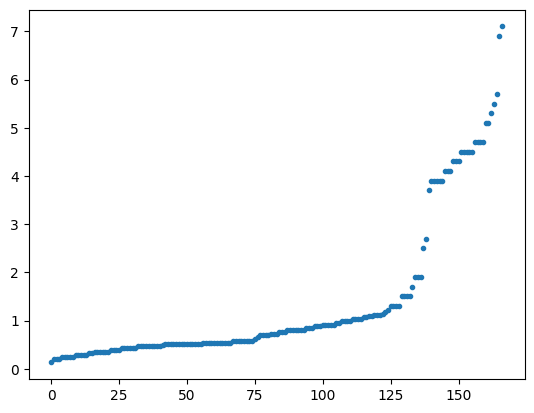

In [ ]:
plt.plot(sorted(y), '.')
plt.show()

Distribuzione apparentemente bimodale

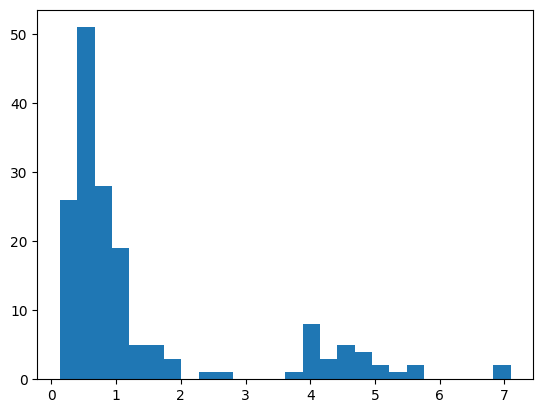

In [ ]:
plt.hist(y, bins='auto')
plt.show()

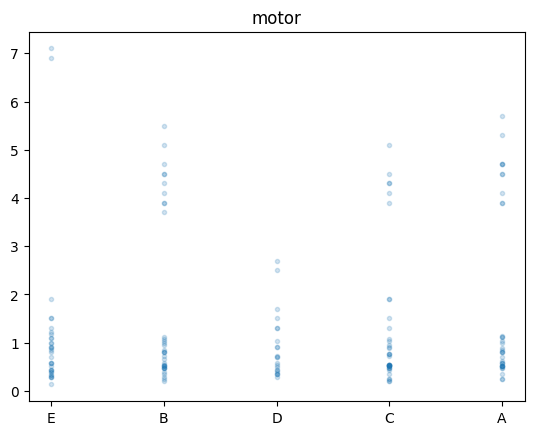

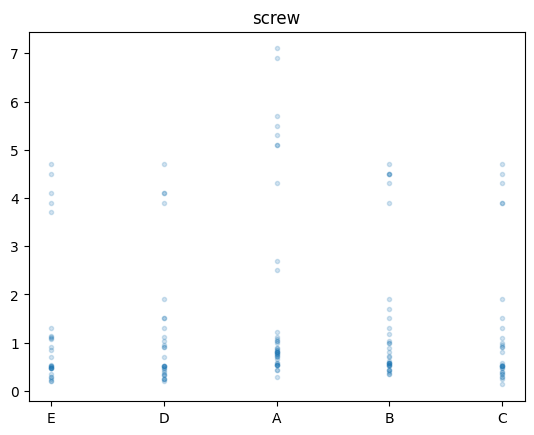

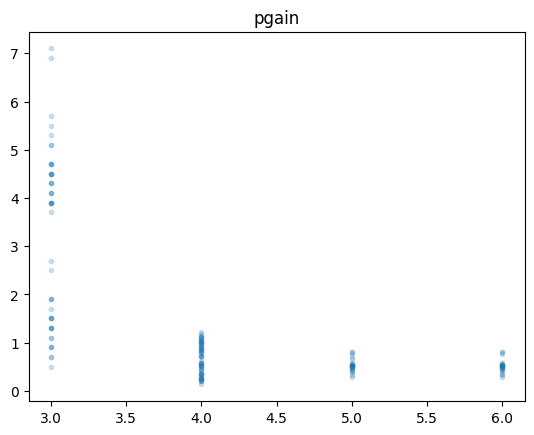

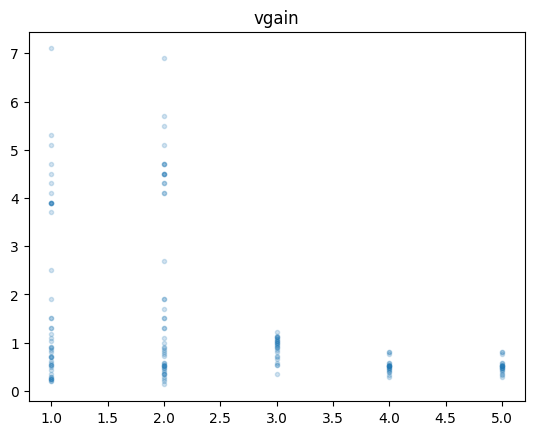

In [ ]:
for feat in X.columns:
  plt.plot(X[feat], y, '.', alpha=0.2)
  plt.title(feat)
  plt.show()

In [ ]:
X['motor'].unique()

array(['E', 'B', 'D', 'C', 'A'], dtype=object)

motor
C    40
B    36
A    36
E    33
D    22
Name: count, dtype: int64


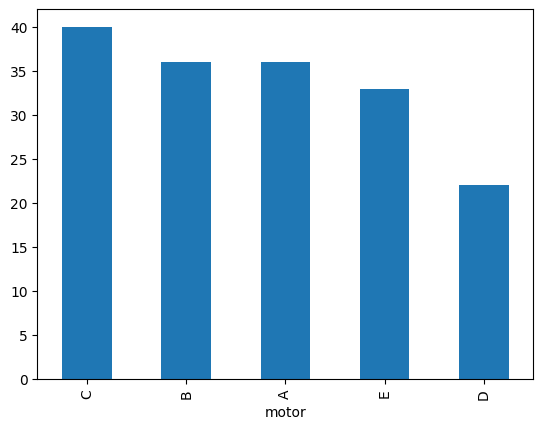

screw
A    42
B    35
C    31
D    30
E    29
Name: count, dtype: int64


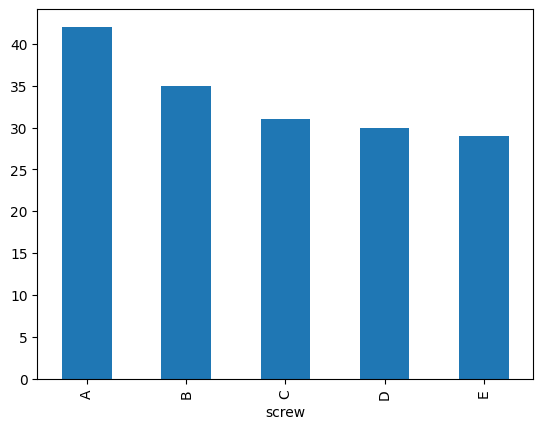

pgain
4    66
3    50
5    26
6    25
Name: count, dtype: int64


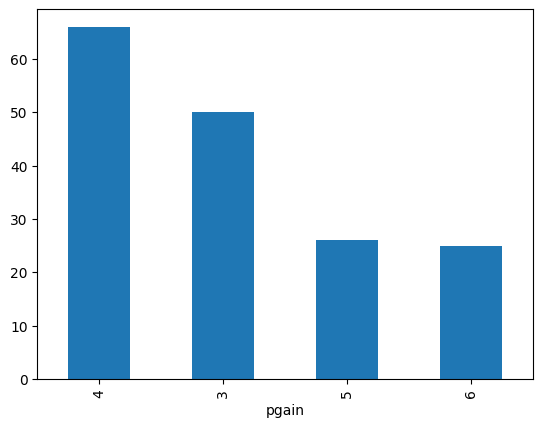

vgain
2    49
1    47
3    27
4    22
5    22
Name: count, dtype: int64


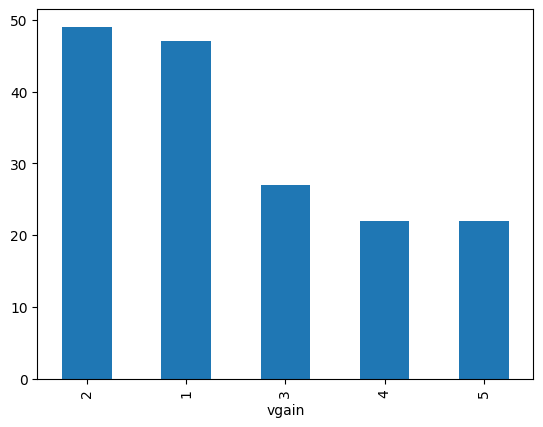

In [ ]:
for feat in X.columns:
  ct = X[feat].value_counts()
  print(ct)
  ct.plot(kind='bar')
  plt.show()

[[25. 25.  0.  0.  0.]
 [20. 22. 24.  0.  0.]
 [ 1.  1.  2. 22.  0.]
 [ 1.  1.  1.  0. 22.]]


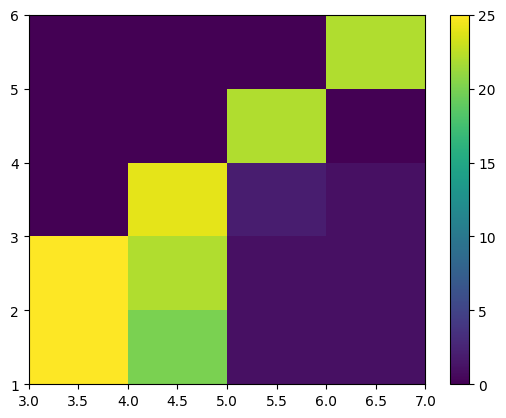

In [ ]:
cc = plt.hist2d(X['pgain'], X['vgain'], bins=([3,4,5,6,7],[1,2,3,4,5,6]))
plt.colorbar()
print(cc[0])
plt.show()

In [ ]:
m_cat = sorted(list(X['motor'].unique()))
s_cat = sorted(list(X['screw'].unique()))
print(m_cat, s_cat)

['A', 'B', 'C', 'D', 'E'] ['A', 'B', 'C', 'D', 'E']


[[ 8  7  7  7  7]
 [ 8  7  7  7  7]
 [12  7  7  7  7]
 [ 7  7  3  3  2]
 [ 7  7  7  6  6]]


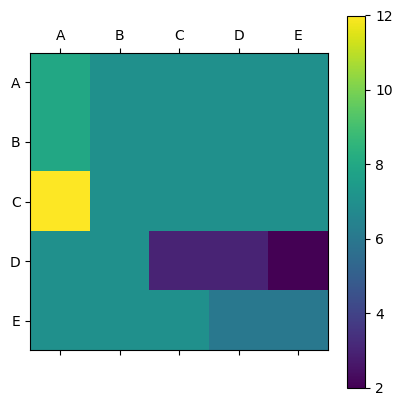

In [ ]:
cd = [[sum((X['motor'] == m) & (X['screw'] == s)) for s in s_cat] for m in m_cat]
print(np.array(cd))
plt.matshow(cd)
plt.xticks(range(5), s_cat)
plt.yticks(range(5), m_cat)
plt.colorbar()
plt.show()

Proviamo una regressione...

In [ ]:
Xd = pd.get_dummies(X, dtype=int)
Xd.head()

,pgain,vgain,motor_A,motor_B,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,screw_D,screw_E
0,5,4,0,0,0,0,1,0,0,0,0,1
1,6,5,0,1,0,0,0,0,0,0,1,0
2,4,3,0,0,0,1,0,0,0,0,1,0
3,3,2,0,1,0,0,0,1,0,0,0,0
4,6,5,0,0,0,1,0,0,1,0,0,0


In [ ]:
model = sm.OLS(y, sm.add_constant(Xd.drop(columns=['motor_C','screw_A']))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     19.68
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.98e-23
Time:                        13:01:49   Log-Likelihood:                -242.54
No. Observations:                 167   AIC:                             507.1
Df Residuals:                     156   BIC:                             541.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6895      0.519     14.806      0.0

<Axes: ylabel='Frequency'>

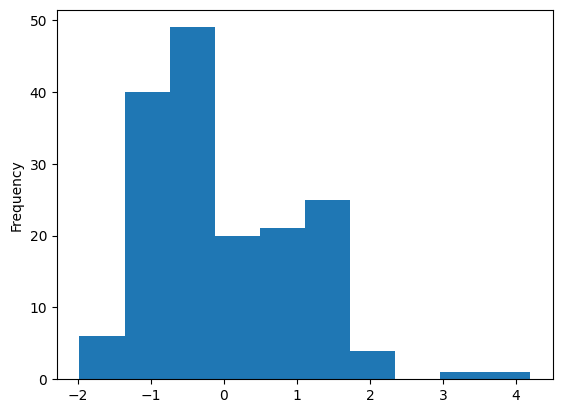

In [ ]:
model.resid.plot(kind='hist')

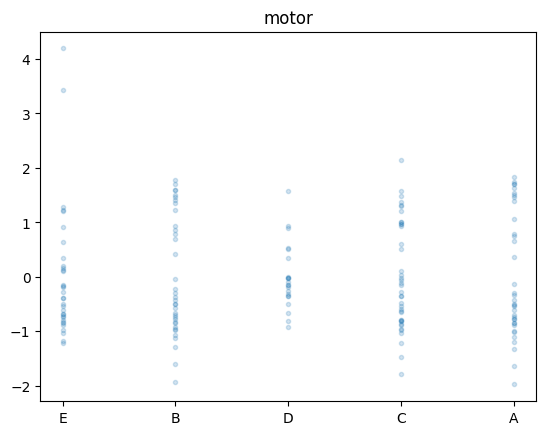

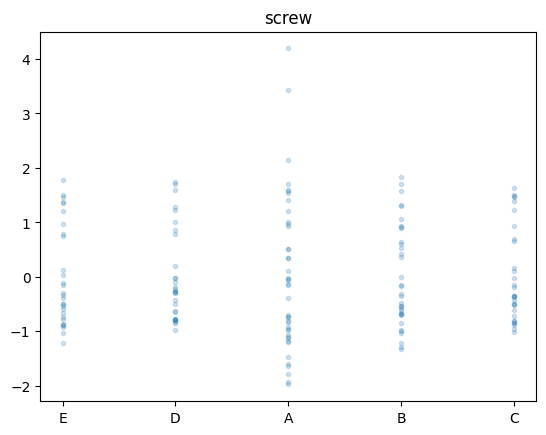

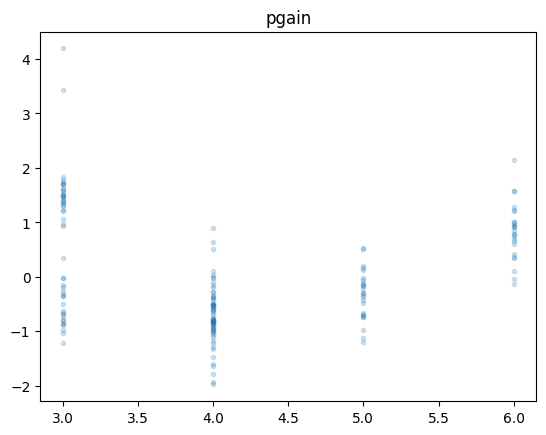

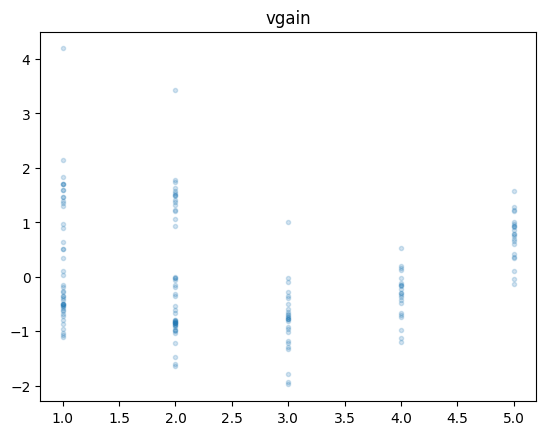

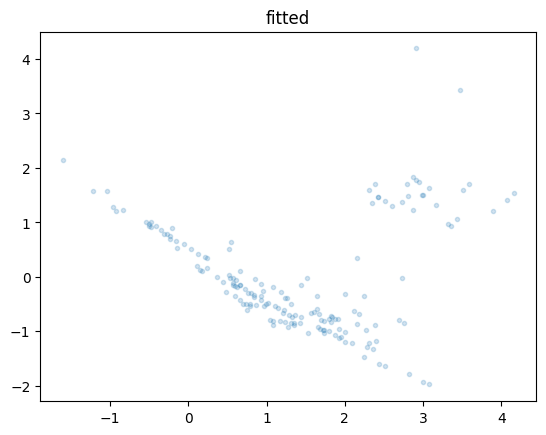

In [ ]:
for feat in X.columns:
  plt.plot(X[feat], model.resid, '.', alpha=0.2)
  plt.title(feat)
  plt.show()

plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
plt.title('fitted')
plt.show()

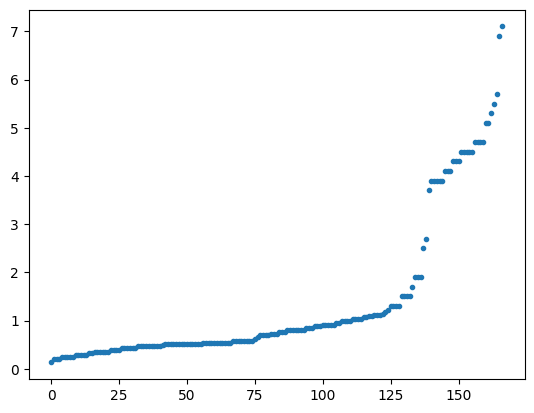

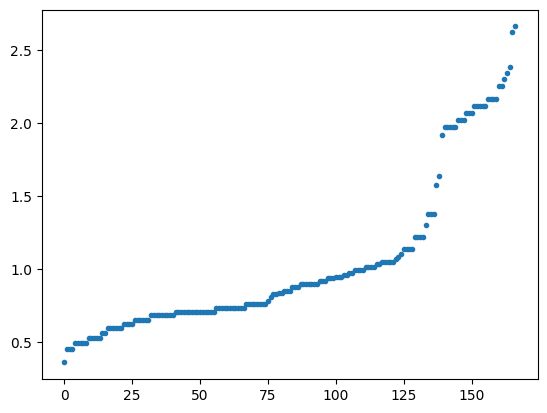

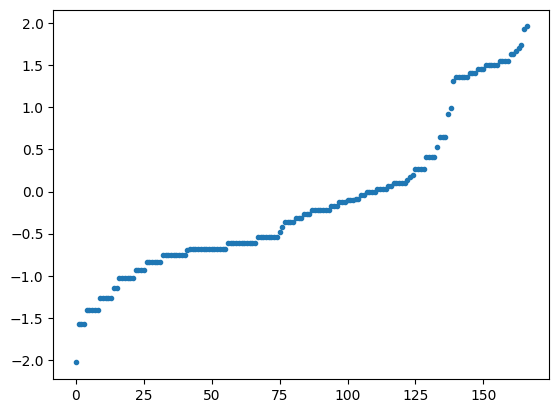

In [ ]:
plt.plot(sorted(y), '.')
plt.show()
plt.plot(sorted(np.sqrt(y)), '.')
plt.show()
plt.plot(sorted(np.log(y)), '.')
plt.show()

In [ ]:
model_log = sm.OLS(np.log(y), sm.add_constant(Xd.drop(columns=['motor_C','screw_A']))).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     30.58
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.98e-32
Time:                        13:08:00   Log-Likelihood:                -128.15
No. Observations:                 167   AIC:                             278.3
Df Residuals:                     156   BIC:                             312.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9286      0.262     15.005      0.0

<Axes: ylabel='Frequency'>

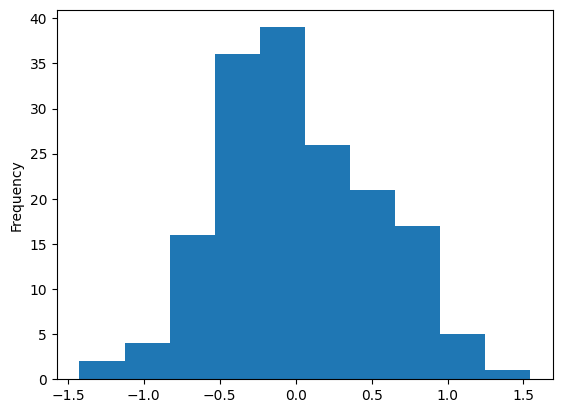

In [ ]:
model_log.resid.plot(kind='hist')

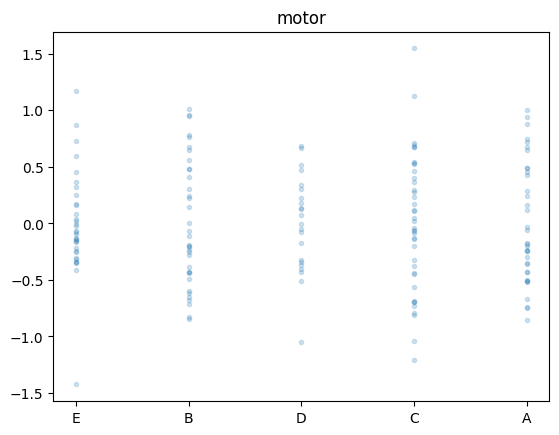

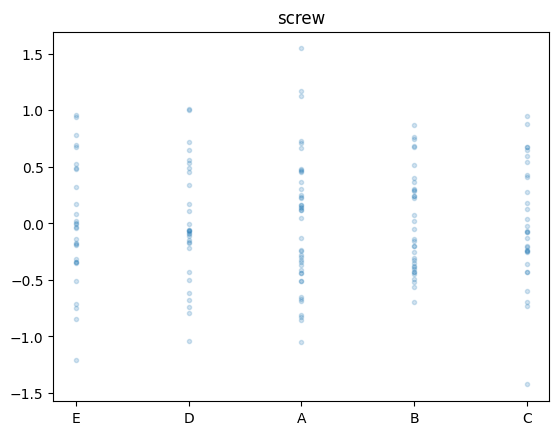

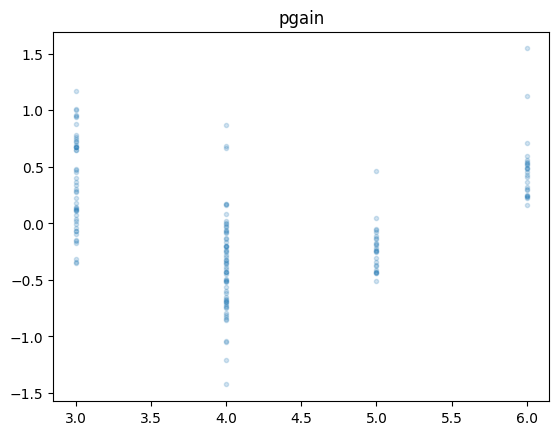

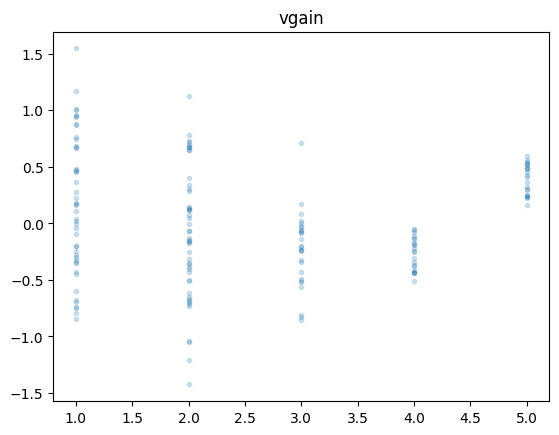

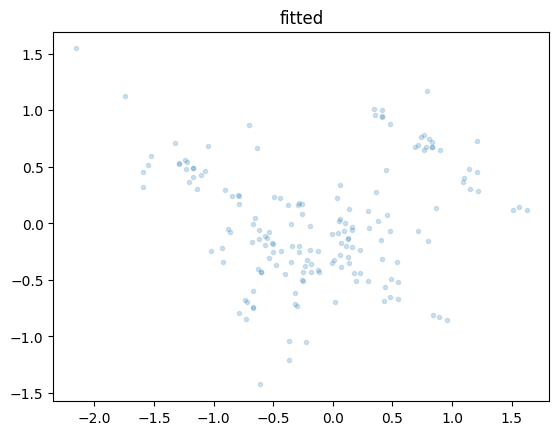

In [ ]:
for feat in X.columns:
  plt.plot(X[feat], model_log.resid, '.', alpha=0.2)
  plt.title(feat)
  plt.show()

plt.plot(model_log.fittedvalues, model_log.resid, '.', alpha=0.2)
plt.title('fitted')
plt.show()

In [ ]:
def ols_check(y, Xdata, Xvars=None):
  if Xvars is None:
    Xvars = Xdata
  model = sm.OLS(y, sm.add_constant(Xdata)).fit()
  print(model.summary())
  model.resid.plot(kind='hist')
  plt.show()
  for feat in Xvars.columns:
    plt.plot(Xvars[feat], model.resid, '.', alpha=0.2)
    plt.title(feat)
    plt.show()

  plt.plot(model.fittedvalues, model.resid, '.', alpha=0.2)
  plt.title('fitted')
  plt.show()

  return model

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     73.59
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           9.57e-56
Time:                        13:38:18   Log-Likelihood:                -66.112
No. Observations:                 167   AIC:                             156.2
Df Residuals:                     155   BIC:                             193.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1592      0.564     18.001      0.0

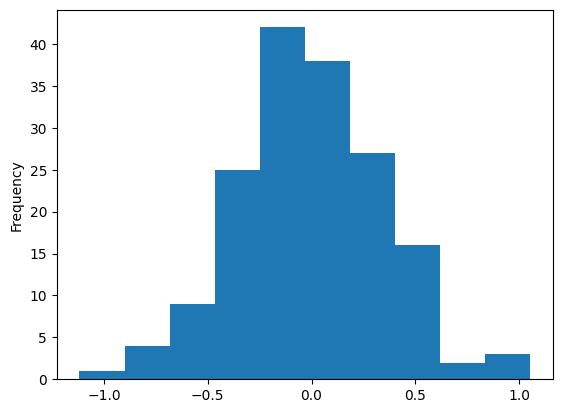

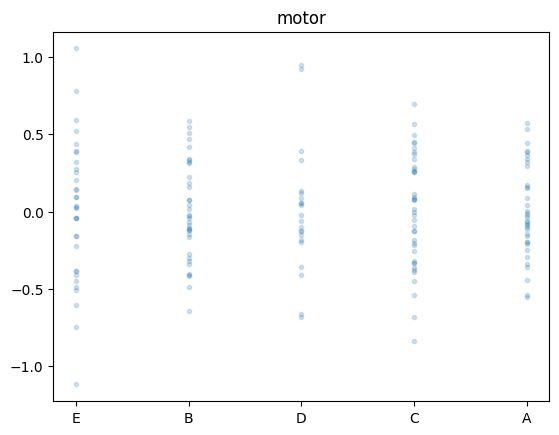

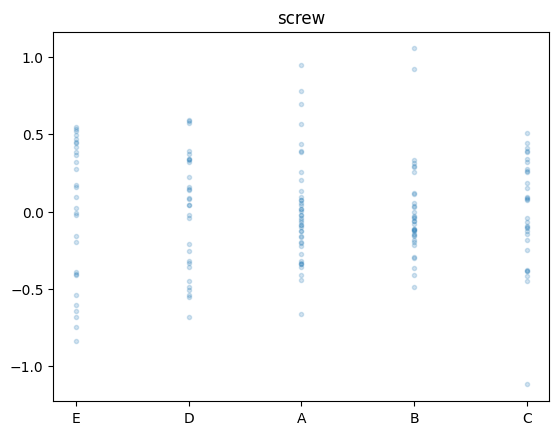

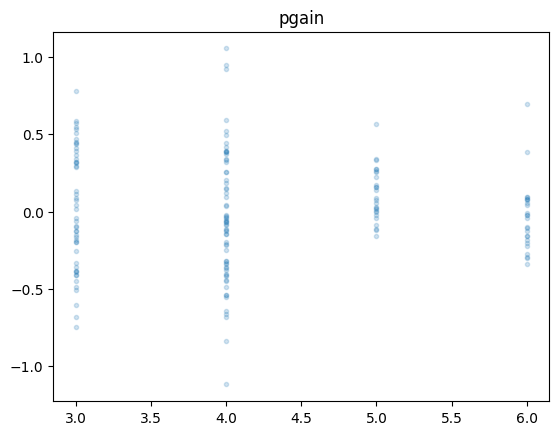

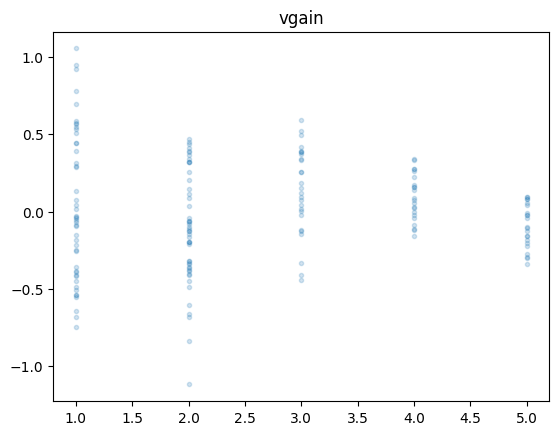

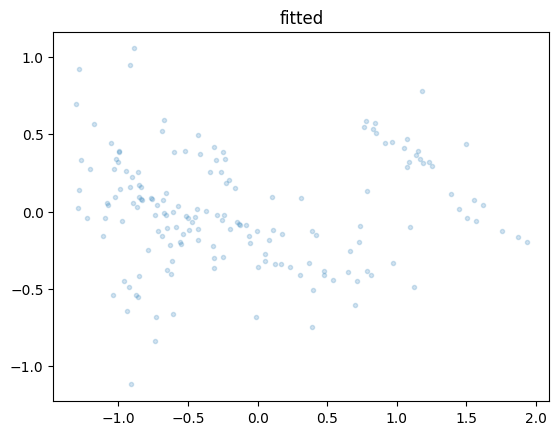

In [ ]:
model_test = ols_check(np.log(y), Xd.drop(columns=['motor_C','screw_E']).join(X['pgain']**2, rsuffix='_2'), X)

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.60e-55
Time:                        13:39:55   Log-Likelihood:                -65.447
No. Observations:                 167   AIC:                             156.9
Df Residuals:                     154   BIC:                             197.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4101      0.608     17.132      0.0

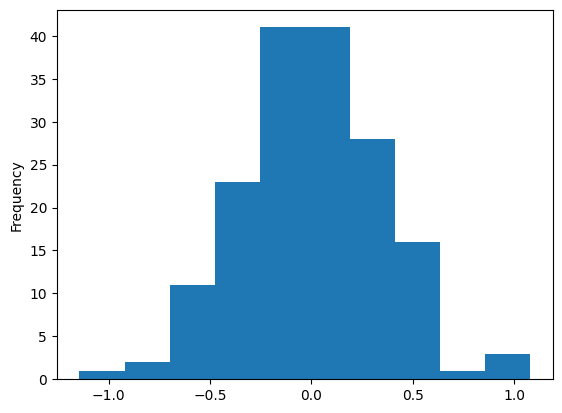

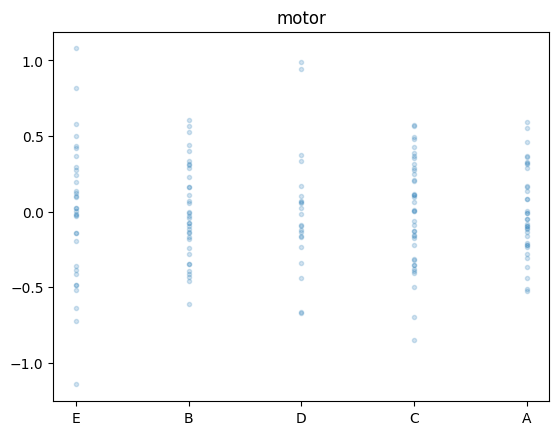

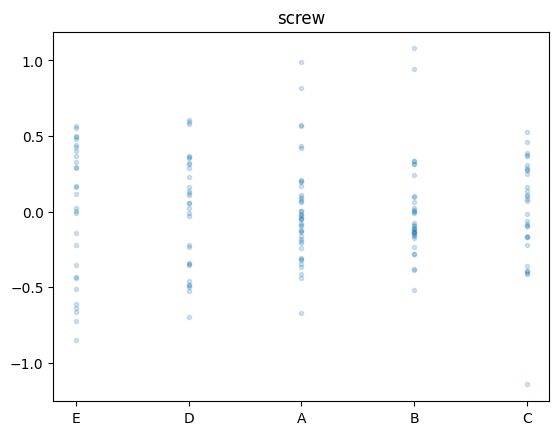

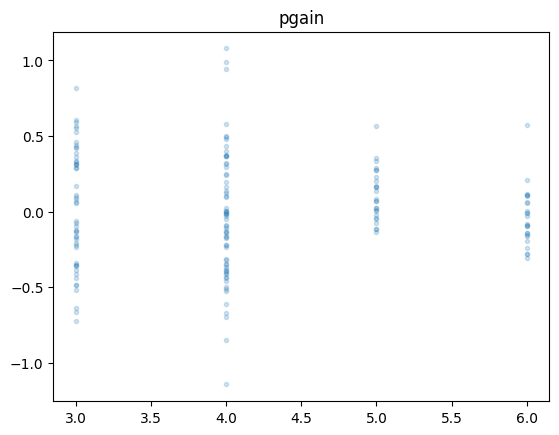

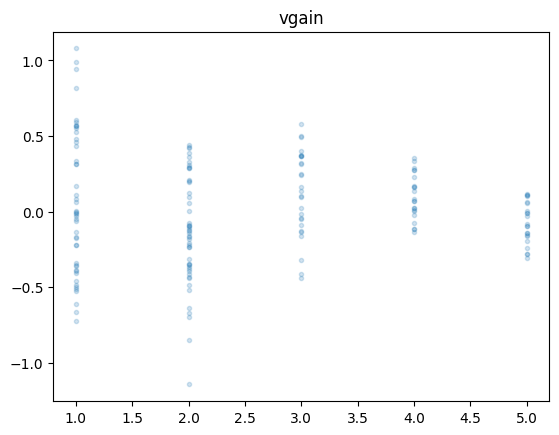

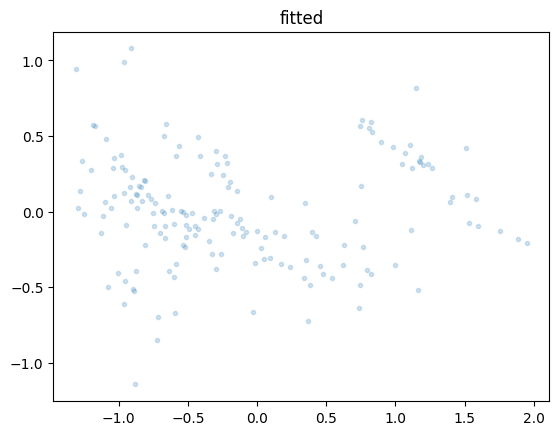

In [ ]:
model_test_1 = ols_check(np.log(y), Xd.drop(columns=['motor_C','screw_E']).join(X[['pgain','vgain']]**2, rsuffix='_2'), X)

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     70.06
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.61e-57
Time:                        13:41:15   Log-Likelihood:                -56.841
No. Observations:                 167   AIC:                             141.7
Df Residuals:                     153   BIC:                             185.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0351      0.866     15.051      0.0

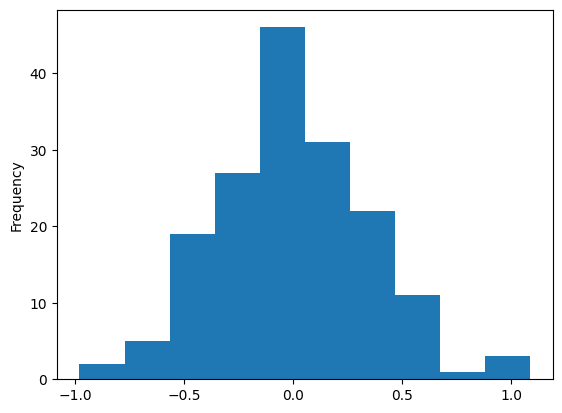

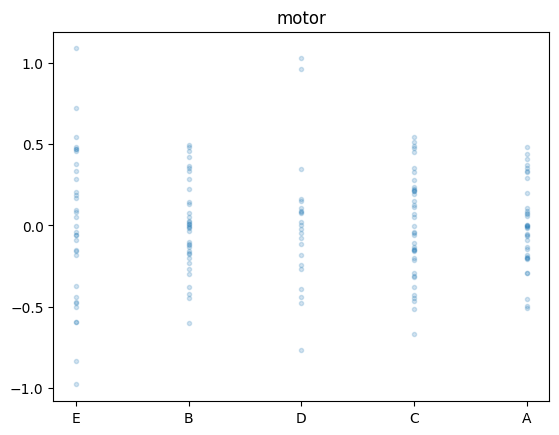

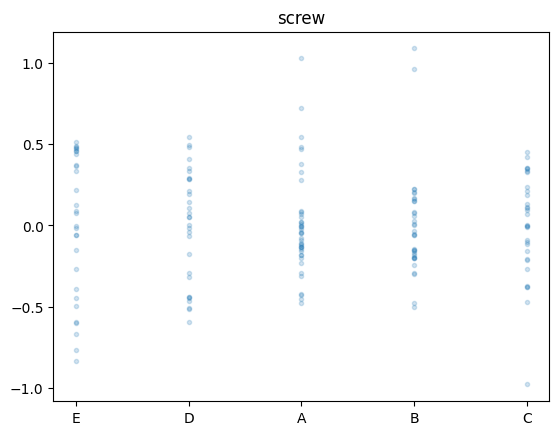

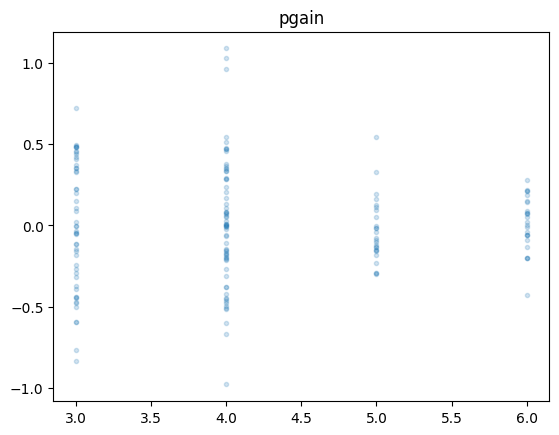

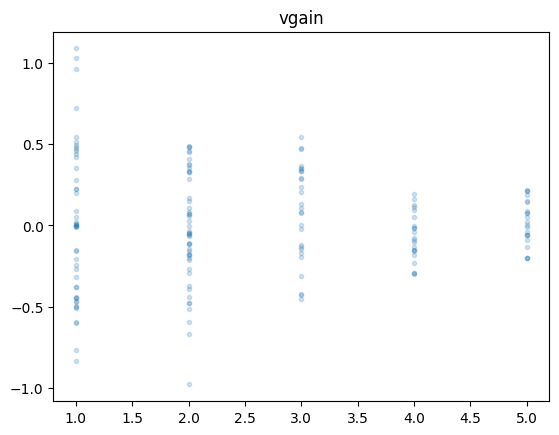

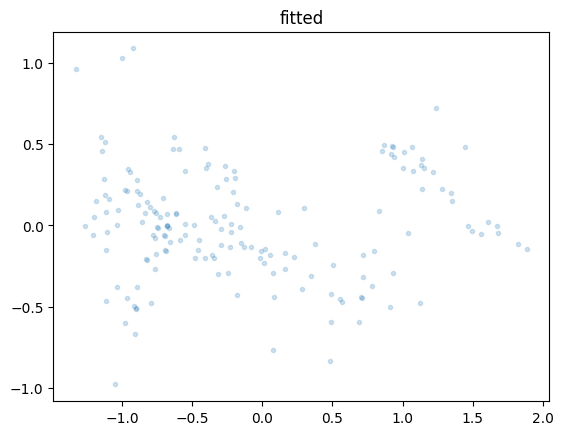

In [ ]:
model_test_1 = ols_check(np.log(y), Xd.drop(columns=['motor_C','screw_E']).join(X[['pgain','vgain']]**2, rsuffix='_2').join(X['vgain']**3, rsuffix='_3'), X)

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     76.39
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.81e-58
Time:                        13:43:42   Log-Likelihood:                -56.849
No. Observations:                 167   AIC:                             139.7
Df Residuals:                     154   BIC:                             180.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1828      0.870     15.160      0.0

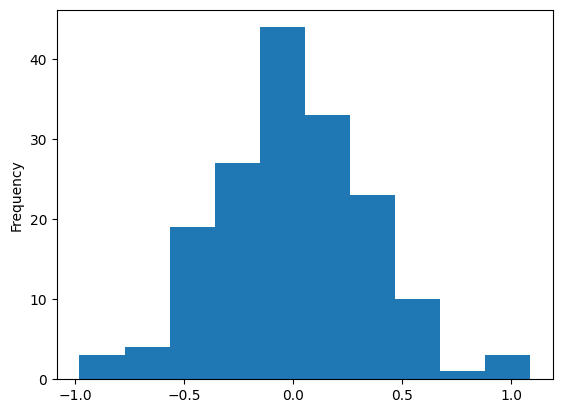

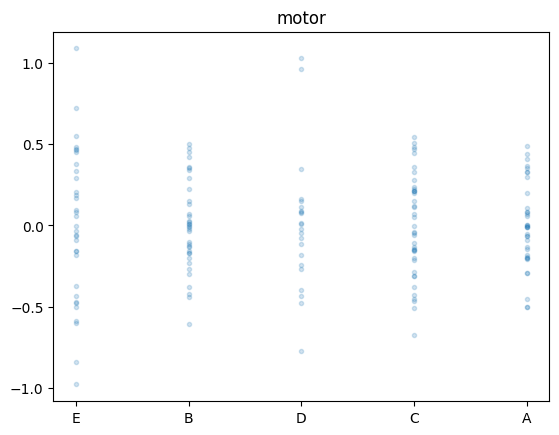

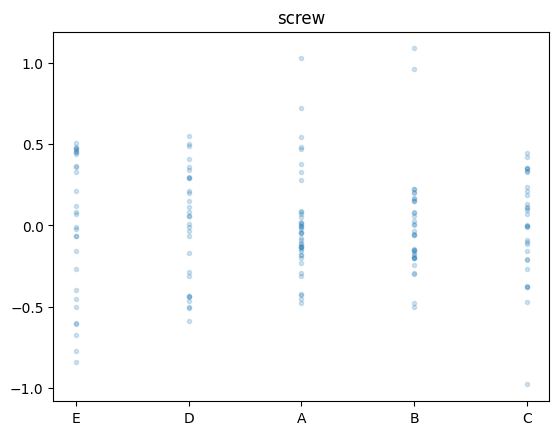

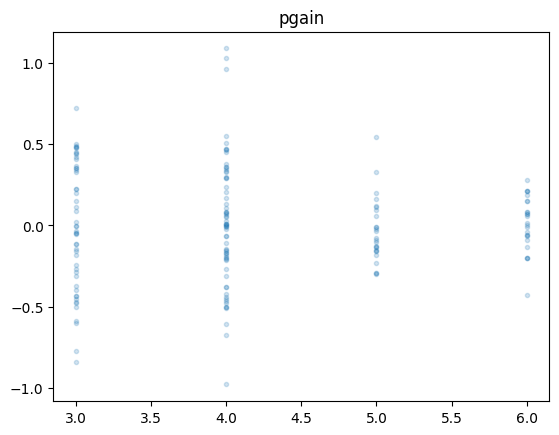

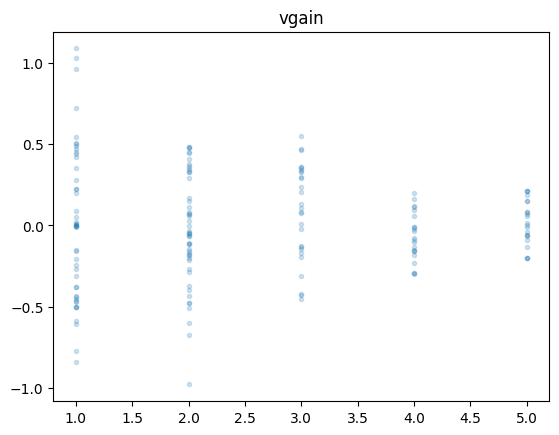

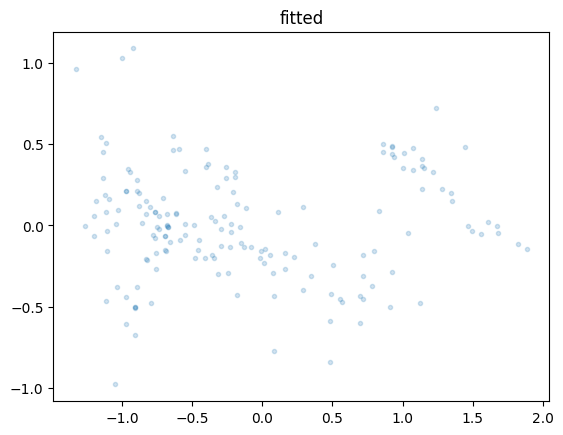

In [ ]:
model_test_2 = ols_check(np.log(y), Xd.drop(columns=['motor_B','screw_E','screw_D']).join(X[['pgain','vgain']]**2, rsuffix='_2').join(X['vgain']**3, rsuffix='_3'), X)

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     83.49
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.62e-59
Time:                        13:50:54   Log-Likelihood:                -57.180
No. Observations:                 167   AIC:                             138.4
Df Residuals:                     155   BIC:                             175.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2155      0.867     15.235      0.0

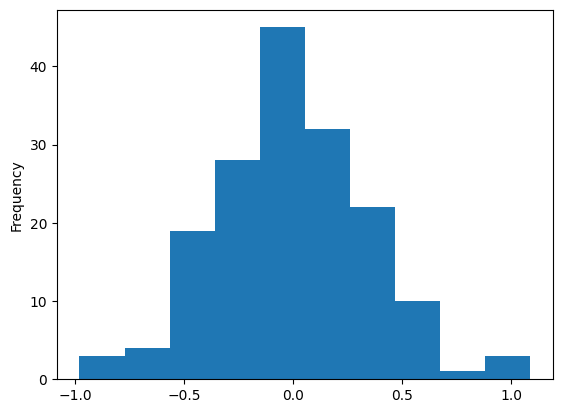

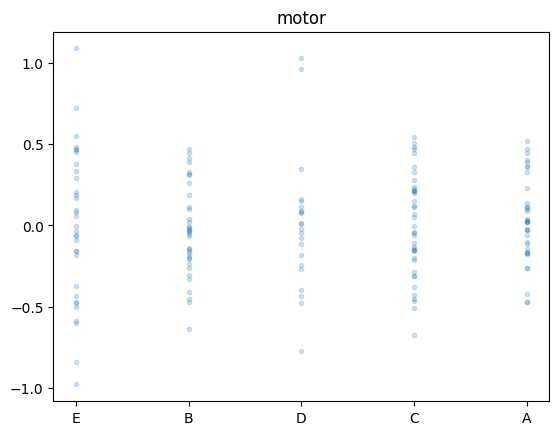

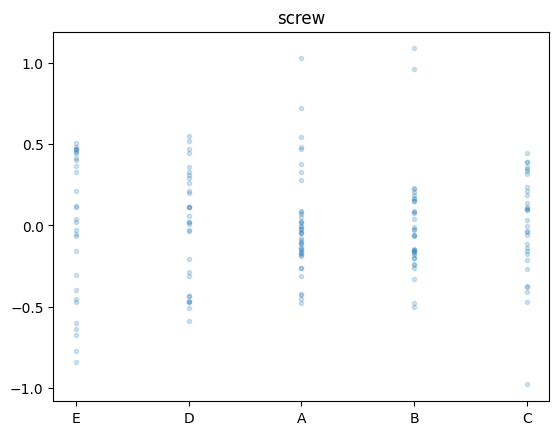

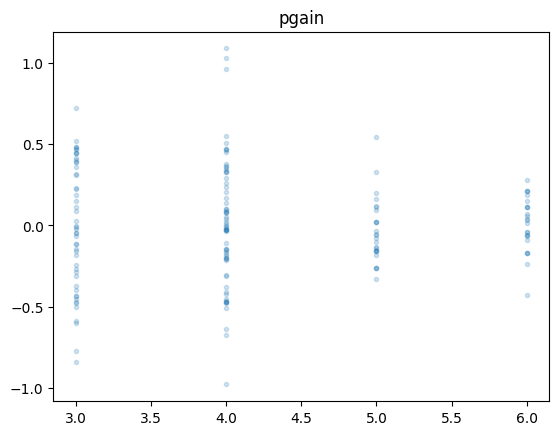

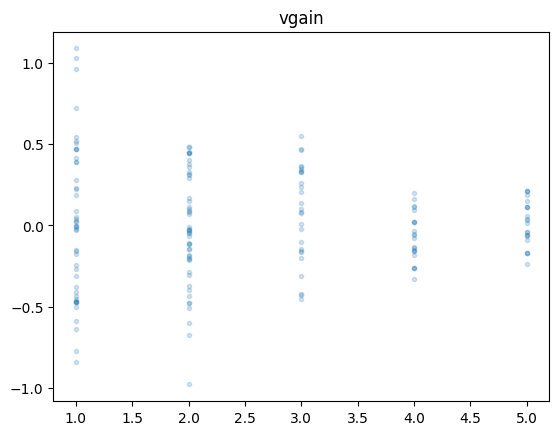

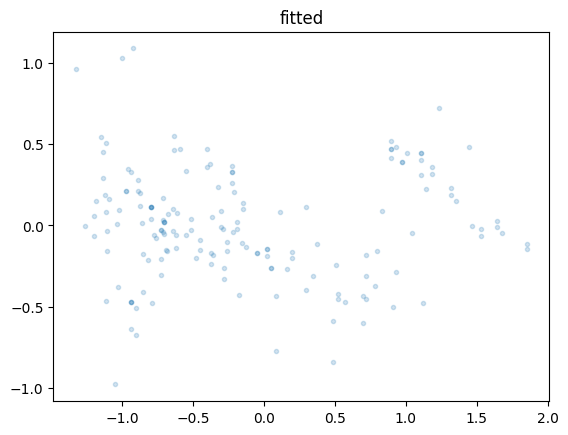

In [ ]:
model_final = ols_check(np.log(y), Xd.drop(columns=['motor_A','motor_B','screw_E','screw_D']).join(X[['pgain','vgain']]**2, rsuffix='_2').join(X['vgain']**3, rsuffix='_3'), X)

C'è ancora la possibilità di migliorare, ma ci fermiamo qui

**stin22tst03 3.3** Usare il modello del punto precedente per prevedere al 95% di confidenza il tempo medio di azionamento nella configurazione A, C, 4, 4

In [ ]:
Xmodel = Xd.drop(columns=['motor_A','motor_B','screw_E','screw_D']).join(X[['pgain','vgain']]**2, rsuffix='_2').join(X['vgain']**3, rsuffix='_3')
Xmodel.head()

,pgain,vgain,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,pgain_2,vgain_2,vgain_3
0,5,4,0,0,1,0,0,0,25,16,64
1,6,5,0,0,0,0,0,0,36,25,125
2,4,3,0,1,0,0,0,0,16,9,27
3,3,2,0,0,0,1,0,0,9,4,8
4,6,5,0,1,0,0,1,0,36,25,125


In [ ]:
X_tilde = X.loc[0]
X_tilde

motor    E
screw    E
pgain    5
vgain    4
Name: 0, dtype: object

In [ ]:
X_tilde['motor'] = 'A'
X_tilde['screw'] = 'C'
X_tilde['pgain'] = 4
X_tilde['vgain'] = 4
X_tilde

<ipython-input-107-525e86618084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tilde['motor'] = 'A'
<ipython-input-107-525e86618084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tilde['screw'] = 'C'
<ipython-input-107-525e86618084>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tilde['pgain'] = 4
<ipython-input-107-525e86618084>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

motor    A
screw    C
pgain    4
vgain    4
Name: 0, dtype: object

In [ ]:
Xd_tilde
Xd_tilde

,4,A,C
motor,False,True,False
screw,False,False,True
pgain,True,False,False
vgain,True,False,False


In [ ]:
model_final.get_prediction()